In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions as fc

In [2]:
n = 200
d = 2

Mu = [np.zeros(2), 5*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)
#Mu = [3 * np.ones(2)]
#Sigma = [np.identity(d)]
#p = [1]
#X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [3]:
sigma = 7
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

In the next cell we derive the vector field $v_t$ for $t = \tau,...,T= K\times \tau$ of the Ornstein Uhlenbeck marginals using the OU dynamics (Z) from the target $\pi_1$ to a gaussian $\gamma^d$. The particules noted X are not necessar to derive $v_t$, they only aim at checking that the dynamic induced by the vector fields $v_t$ reproduced OU process, which is not the case for the moment... 

iter0
iter10
iter20
iter30
iter40
iter50
iter60
iter70
iter80
iter90
iter100
iter110
iter120
iter130
iter140
iter150
iter160
iter170
iter180
iter190


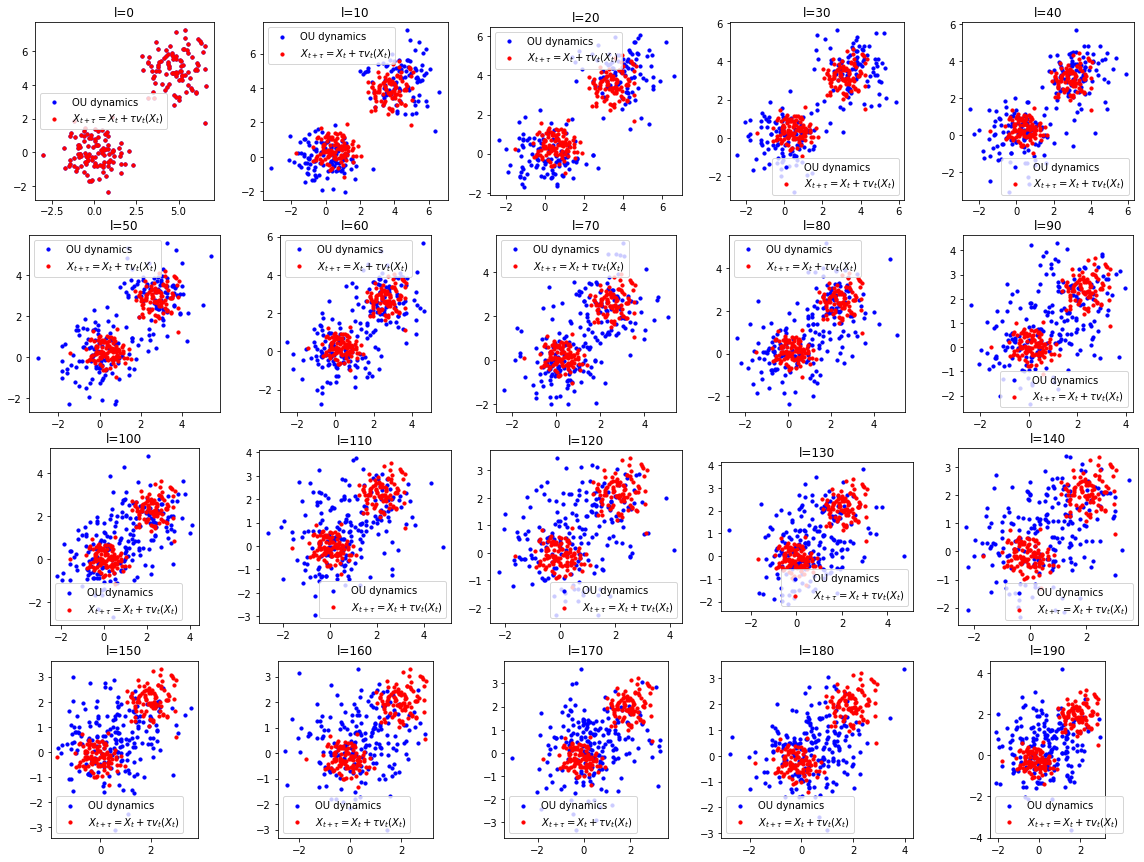

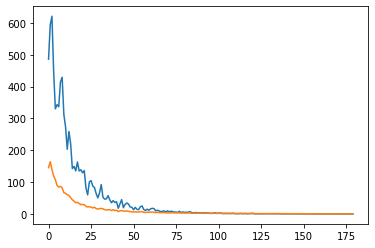

In [11]:
import functions as fc
import importlib
importlib.reload(fc)

V = []
N_iter = 200
tau = 0.01
lambd = 0.5
X = X1 
Z = X1
L1 = []
L2 = []
fig, axs = plt.subplots(nrows=2*N_iter//100, ncols=5, figsize=(20, 15))

xlim = (-4, 4)
ylim = (-4, 4)

for l in range(N_iter):
    t = (l+1) * tau
     
    if l%10 == 0:
        print('iter'+str(l))
        ll = l//10
        ax = axs[ll//5, ll%5]
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        #plt.show()
        ax.scatter(X[:, 0], X[:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        #plt.show()
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        # ax.set_xlim(xlim)
        # ax.set_ylim(ylim)
        ax.legend()
    
    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1+ sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    M = lambda x : k(Z, x)[:, :, None] * eps[:,np.newaxis,:] / sigma_t + dk(Z, x)
    v = lambda x : 1/n * np.sum(phi[:, np.newaxis, np.newaxis] * M(x), axis=0)
    V.append(v)

    L1.append(fc.Loss1(v,Z,Mu[0],phi,Xi,t,k,dk,sigma,lambd))
    L2.append(fc.Loss2(v,Z,eps,Mu[0],phi,Xi,psi,t,k,dk,sigma,lambd))

    #print(L1[-1])
    #print(L2[-1])

    X = X + tau * v(X)

plt.figure()    
plt.plot(L1[20:]) # eq 3
#plt.figure()
plt.plot(L2[20:]) # eq 5
plt.show()


 

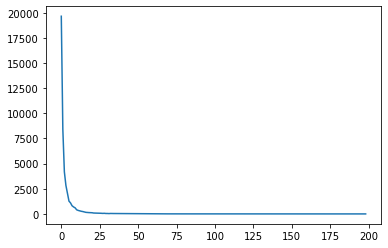

In [5]:
plt.figure()    
#plt.plot(L1[1:]) # eq 3
#plt.figure()
plt.plot(L2[1:]) # eq 5
plt.show()



In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

In [6]:
m = 100
Y = scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

for i in range(K):
    Y = Y - tau * V[K-1-i](Y)

plt.scatter(Y[:,0], Y[:,1])
plt.show()


NameError: name 'K' is not defined

In [ ]:
import numpy as np
mu = np.ones(2)
z = np.random.randn(5,2)

In [ ]:
print(z)
print((z - mu) * mu) 